## Desafío Miércoles Semana 5 - Regresión desde la econometría
###  Gustavo Morales, G10 - 07.Oct.2019

#### Ejercicio 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from pprint import pprint

In [2]:
df = pd.read_csv("Credit.csv")
df = df.drop(columns='Unnamed: 0')

In [3]:
cat_vars = ['Gender', 'Student', 'Married','Ethnicity']
con_vars = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

In [4]:
for var in cat_vars:
    print(df[var].value_counts())

Female    207
 Male     193
Name: Gender, dtype: int64
No     360
Yes     40
Name: Student, dtype: int64
Yes    245
No     155
Name: Married, dtype: int64
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64


In [5]:
df['is_Male'] = np.where(df['Gender']==' Male', 1, 0)

In [6]:
df['is_Student'] = np.where(df['Student']=='Yes', 1, 0)

In [7]:
df['is_Married'] = np.where(df['Married']=='No', 1, 0)

In [8]:
df['is_AfricanAmerican'] = np.where(df['Ethnicity']=='African American', 1, 0)
df['is_Asian'] = np.where(df['Ethnicity']=='Asian', 1, 0)

In [9]:
df.drop(columns=(cat_vars), inplace=True)

#### Ejercicio 2

In [10]:
def plot_hist(dataframe, variable):
    sns.distplot(dataframe[variable].dropna(), kde=False, bins=8, color='tomato')
    plt.axvline(np.mean(dataframe[variable]), color='red', label='mean')
    plt.axvline(np.median(dataframe[variable]), linestyle='--', color='red', label='median')
    plt.legend()

In [11]:
con_vars_2 = ['Balance', 'Income', 'Cards', 'Rating']

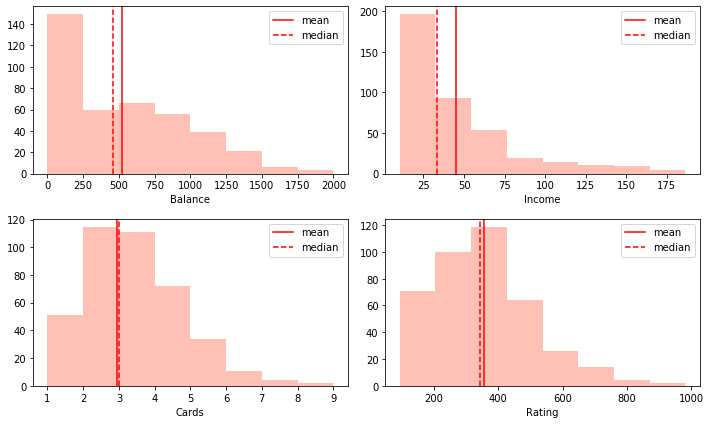

In [12]:
plt.figure(figsize=(10,6))
for i, var in enumerate(con_vars_2):
    plt.subplot(2,2,i+1)
    plot_hist(df, var)
plt.tight_layout()

**(R)** Las variables que parecen distribuir de forma normal son `Cards` y `Rating`, considerando además que sus medias y medianas son similares. En contraste, las variables `Income` y `Balance` parecen no distribuir normalmente, y además sus medianas y medias están relativamente más separadas.

#### Ejercicio 3

In [13]:
def get_model(formula_like, dataframe):
    """
    https://www.statsmodels.org/devel/gettingstarted.html
    """
    y, X = dmatrices(formula_like, data=dataframe, return_type='dataframe', NA_action='drop')
    model = sm.OLS(y,X)
    return model.fit()

In [14]:
formulae = ['Balance ~ is_Student',
            'Balance ~ Income',
            'Balance ~ Rating']
models = {formula: get_model(formula, df) for formula in formulae}

In [15]:
get_model('Balance ~ is_Student', df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.49e-07
Time:                        23:36:16   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
is_Student   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
get_model('Balance ~ Income', df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.03e-22
Time:                        23:36:16   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
get_model('Balance ~ Rating', df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):          1.90e-120
Time:                        23:36:16   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(R)** Mirando el parámetro de ajuste $R^2$, la variable que presenta un mayor poder explicativo de la variabilidad de `Balance` es `Rating`. La interpretación es que un $\sim 75\%$ de la variación de `Balance` puede explicarse por `Rating`.

Para la prueba de hipótesis para muestras separadas entre estudiantes y no estudiantes sobre `Balance`:

In [18]:
model = smf.ols('Balance ~ is_Student', df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.49e-07
Time:                        23:36:16   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
is_Student   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(R)** Mirando **Prob (F-statistic)**, con una significancia de un `0.000001` se rechaza la hipótesis nula de que las diferencias en los promedios de deudas en tarjetas de crédito no son significativamente diferentes entre estudiantes y no estudiantes.

#### Ejercicio 4

Para evitar un potencial problema de colinearidad, voy a mirar el `heatmap` del dataframe, concentrándome en las variables altamente correlacionadas:

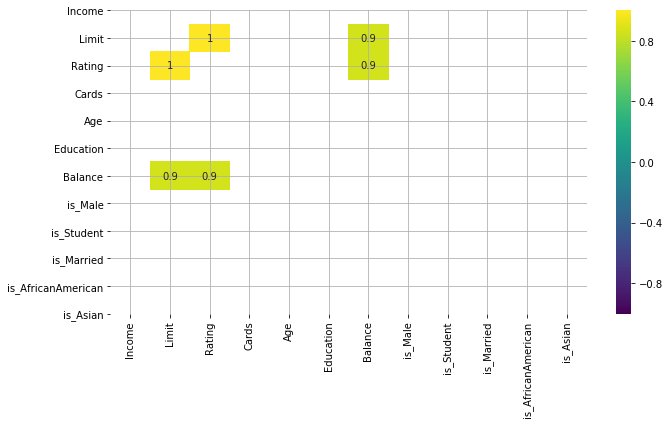

In [31]:
dfcorr = df.corr().dropna()
plt.rcParams['figure.figsize'] = 10, 6
ax = sns.heatmap(dfcorr[((dfcorr>.8)|(dfcorr<-.8)) & (dfcorr<1)],
                 annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.1g')
plt.grid()
plt.tight_layout()

Notar que `Limit` y `Rating` están altamente correlacionadas. Me quedaré con `Rating` sólo para ser consistente con lo que encontré anteriormente.

In [20]:
string = 'Balance ~ '
for var in df.columns.tolist():
    if var != 'Balance' and var != 'Limit':
        string += var
        string += ' + '
string = string[:-3]
print(string)

Balance ~ Income + Rating + Cards + Age + Education + is_Male + is_Student + is_Married + is_AfricanAmerican + is_Asian


In [21]:
res = get_model(string, dataframe=df)

In [22]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):          4.46e-248
Time:                        23:36:17   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -564.4850     33.602    -16.799      0.000    -630.549    -498.421
Income                -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                 3.9790      0.055     72.332      0.000       3.871       4.087
Cards                  3.9654      3.793      1.045      0.296      -3.492      11.422
Age                   -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education             -0.3799      1.659     -0.229      0.819      -3.642       2.882
is_Male               10.7106     10.325      1.037      0.300      -9.589      31.010
is_Student           416.4376     17.336     24.021      0.000     382.353     450.522
is_Married            15.1096     10.728      1.408      0.160      -5.983      36.202
is_AfricanAmerican   -10.6492     12.716     -0.837      0.403     -35.649      14.351
is_Asian              11.1124     12.600      0.882      0.378     -13.661      35.886
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(R)** Mirando el parámetro de ajuste $R^2$, podemos decir que las variaciones en `Balance` son explicadas en un $~\sim 95\%$ por el resto de los regresores. Estos predictores varían principalmente en cuán significativamente explican las variaciones de `Balance`.

#### Ejercicio 5

Mirando la tabla anterior, los predictores significativos son:

In [23]:
string2 = 'Balance ~ Income + Rating + is_Student'

In [24]:
res = get_model(string2, dataframe=df)

In [25]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2502.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):          6.23e-257
Time:                        23:36:17   Log-Likelihood:                -2420.7
No. Observations:                 400   AIC:                             4849.
Df Residuals:                     396   BIC:                             4865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -581.0789     13.835    -42.002      0.000    -608.277    -553.880
Income        -7.8749      0.240    -32.783      0.000      -8.347      -7.403
Rating         3.9875      0.055     72.888      0.000       3.880       4.095
is_Student   418.7603     17.230     24.304      0.000     384.886     452.634
==============================================================================
Omnibus:                       13.580   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.236
Skew:                           0.445   Prob(JB):                     0.000810
Kurtosis:                       2.750   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(R)** En términos del nuevo $R^2$, vemos que el ajuste no mejoró ni empeoró sustancialmente. Esto es lógico porque eliminamos variables que no explicaban la variación de `Balance` de forma significativa ($p \geq 0.025$). Es decir, luego de depurar el dataset, concluyo que `Income`, `Rating` y `is_Student` explican en un $\sim 95\%$ las variaciones en `Balance`. La mejora respecto al análisis anterior es que ahora son sólo variables correlacionadas con alta significancia.

#### Ejercicio 6

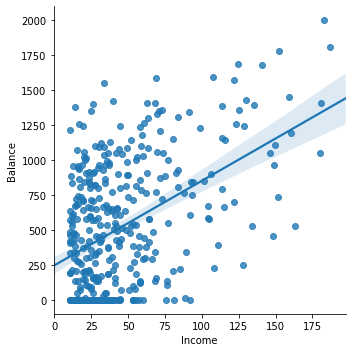

In [26]:
sns.lmplot(x='Income', y='Balance', data=df);

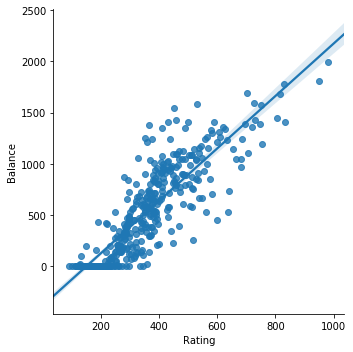

In [27]:
sns.lmplot(x='Rating', y='Balance', data=df);

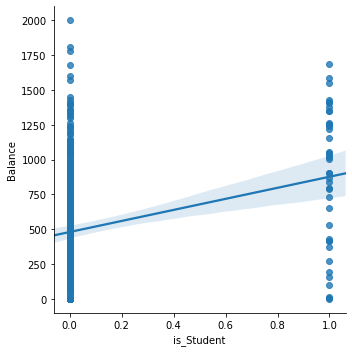

In [28]:
sns.lmplot(x='is_Student', y='Balance', data=df);

Podemos confirmar que efectivamente estas variables son relativamente buenos predictores, aunque `is_Student` es (naturalmente) bimodal.